In [6]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [7]:
# Loading the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [8]:
df.shape

(1000, 2)

In [9]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# **Data Preprocessing**

In [11]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evilshadow/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [13]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [14]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

# **Model Building**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [18]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 76.5%
Precision score is: 0.76
Recall score is: 0.79


In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[72, 25],
       [22, 81]])

Text(69.0, 0.5, 'Actual values')

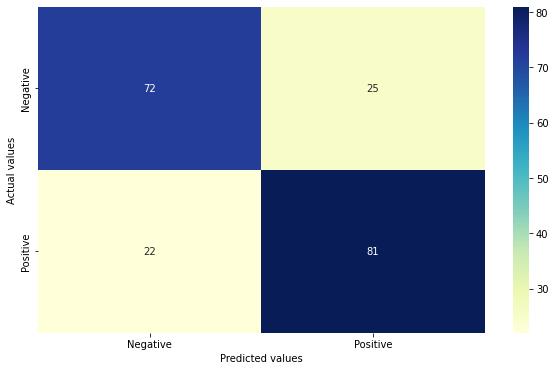

In [21]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [22]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [23]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [24]:
import nltk
import re

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Cleaning the reviews
corpus = []
lemmatizer = WordNetLemmatizer()

for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Lemmatizing the words
  review = [lemmatizer.lemmatize(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/evilshadow/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500)
X = tfidf.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)
# Calculate and print scores for Logistic Regression

# Support Vector Machine
classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
y_pred_svc = classifier_svc.predict(X_test)
# Calculate and print scores for SVM


In [31]:
from sklearn.model_selection import GridSearchCV

# Tuning Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_lr = GridSearchCV(LogisticRegression(), param_grid)
grid_lr.fit(X_train, y_train)
# Print best parameters and scores

# Tuning SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid_svc = GridSearchCV(SVC(), param_grid)
grid_svc.fit(X_train, y_train)
# Print best parameters and scores


/Users/evilshadow/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/evilshadow/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision and recall for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Print scores for Logistic Regression
print("---- Logistic Regression Scores ----")
print("Accuracy score is: {}%".format(round(accuracy_lr*100,2)))
print("Precision score is: {}".format(round(precision_lr,2)))
print("Recall score is: {}".format(round(recall_lr,2)))

# Calculate accuracy, precision and recall for SVM
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)

# Print scores for SVM
print("\n---- SVM Scores ----")
print("Accuracy score is: {}%".format(round(accuracy_svc*100,2)))
print("Precision score is: {}".format(round(precision_svc,2)))
print("Recall score is: {}".format(round(recall_svc,2)))


---- Logistic Regression Scores ----
Accuracy score is: 71.0%
Precision score is: 0.76
Recall score is: 0.64

---- SVM Scores ----
Accuracy score is: 73.5%
Precision score is: 0.89
Recall score is: 0.55


In [33]:
# Print best parameters and scores for Logistic Regression
print("\n---- Logistic Regression Best Parameters ----")
print("Best parameters: ", grid_lr.best_params_)
print("Best score: ", grid_lr.best_score_)

# Print best parameters and scores for SVM
print("\n---- SVM Best Parameters ----")
print("Best parameters: ", grid_svc.best_params_)
print("Best score: ", grid_svc.best_score_)



---- Logistic Regression Best Parameters ----
Best parameters:  {'C': 1}
Best score:  0.76

---- SVM Best Parameters ----
Best parameters:  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Best score:  0.76


# **Predictions**

In [25]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [26]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [27]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!


In [28]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a POSITIVE review.
